In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
"""
 用户id,账单时间戳,银行id,上期账单金额,上期还款金额,信用卡额度,
 本期账单余额,本期账单最低还款额,消费笔数,本期账单金额,调整金额,
 循环利息,可用金额,预借现金额度,还款状态
"""
names = ["id","time","bank_id","pre_amount_of_bill","pre_repayment","credit_amount",\
         "amount_of_bill_left","least_repayment","consume_amount","amount_of_bill","adjust_amount",\
         "circ_interest","avail_amount","prepare_amount","repayment_state"]
bill_train = pd.read_csv("../../pcredit/train/bill_detail_train.txt",header=None)

In [6]:
bill_train.columns=names
bill_train.head()

,id,time,bank_id,pre_amount_of_bill,pre_repayment,credit_amount,amount_of_bill_left,least_repayment,consume_amount,amount_of_bill,adjust_amount,circ_interest,avail_amount,prepare_amount,repayment_state
0,3150,5906744363,6,18.626118,18.661937,20.664418,18.905766,17.847133,1,0.0,0.0,0.0,0.0,19.971271,0
1,3150,5906744401,6,18.905766,18.909954,20.664418,19.113305,17.911506,1,0.0,0.0,0.0,0.0,19.971271,0
2,3150,5906744427,6,19.113305,19.150290,20.664418,19.300194,17.977610,1,0.0,0.0,0.0,0.0,19.971271,0
3,3150,5906744515,6,19.300194,19.300280,21.000890,20.303240,18.477177,1,0.0,0.0,0.0,0.0,20.307743,0
4,3150,5906744562,6,20.303240,20.307744,21.000890,20.357134,18.510985,1,0.0,0.0,0.0,0.0,20.307743,0


In [6]:
#bill_train.describe()
bill_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2338118 entries, 0 to 2338117
Data columns (total 15 columns):
id                     int64
time                   int64
bank_id                int64
pre_amount_of_bill     float64
pre_repayment          float64
credit_amount          float64
amount_of_bill_left    float64
least_repayment        float64
consume_amount         int64
amount_of_bill         float64
adjust_amount          float64
circ_interest          float64
avail_amount           float64
prepare_amount         float64
repayment_state        int64
dtypes: float64(10), int64(5)
memory usage: 267.6 MB


In [11]:
help(bill_train.pivot_table)

Help on method pivot_table in module pandas.tools.pivot:

pivot_table(data, values=None, index=None, columns=None, aggfunc='mean', fill_value=None, margins=False, dropna=True, margins_name='All') method of pandas.core.frame.DataFrame instance
    Create a spreadsheet-style pivot table as a DataFrame. The levels in the
    pivot table will be stored in MultiIndex objects (hierarchical indexes) on
    the index and columns of the result DataFrame
    
    Parameters
    ----------
    data : DataFrame
    values : column to aggregate, optional
    index : column, Grouper, array, or list of the previous
        If an array is passed, it must be the same length as the data. The list
        can contain any of the other types (except list).
        Keys to group by on the pivot table index.  If an array is passed, it
        is being used as the same manner as column values.
    columns : column, Grouper, array, or list of the previous
        If an array is passed, it must be the same leng

In [7]:
data = bill_train.head(100)
data.head()

,id,time,bank_id,pre_amount_of_bill,pre_repayment,credit_amount,amount_of_bill_left,least_repayment,consume_amount,amount_of_bill,adjust_amount,circ_interest,avail_amount,prepare_amount,repayment_state
0,3150,5906744363,6,18.626118,18.661937,20.664418,18.905766,17.847133,1,0.0,0.0,0.0,0.0,19.971271,0
1,3150,5906744401,6,18.905766,18.909954,20.664418,19.113305,17.911506,1,0.0,0.0,0.0,0.0,19.971271,0
2,3150,5906744427,6,19.113305,19.150290,20.664418,19.300194,17.977610,1,0.0,0.0,0.0,0.0,19.971271,0
3,3150,5906744515,6,19.300194,19.300280,21.000890,20.303240,18.477177,1,0.0,0.0,0.0,0.0,20.307743,0
4,3150,5906744562,6,20.303240,20.307744,21.000890,20.357134,18.510985,1,0.0,0.0,0.0,0.0,20.307743,0


In [8]:
#  对信用卡额度,消费笔数,可用金额,循环利息,预借现金额度, 进行聚类
columns = ['credit_amount',"consume_amount","avail_amount","circ_interest","prepare_amount"]
pd.pivot_table(data,index=['id'],values=columns,aggfunc=np.min)

,avail_amount,circ_interest,consume_amount,credit_amount,prepare_amount
id,,,,,
1265,0.0,0.000000,0,19.748127,0.000000
3150,0.0,0.000000,0,0.000000,0.000000
6360,0.0,0.000000,1,20.441274,0.000000
6965,0.0,15.288139,2,19.971271,19.278123


In [36]:
new_bill_train_min = pd.pivot_table(bill_train,index=["id"],values=columns,aggfunc=np.min)

In [42]:
new_bill_train_max = pd.pivot_table(bill_train,index=["id"],values=columns,aggfunc=np.max)

In [9]:
new_bill_train_mean = pd.pivot_table(bill_train,index=["id"],values=columns,aggfunc=np.mean)

In [24]:
new_bill_train_mean['id'] = new_bill_train_mean.index
ax = ['id','avail_amount','circ_interest','consume_amount','credit_amount','prepare_amount']
df = new_bill_train_mean[ax]
df

,id,avail_amount,circ_interest,consume_amount,credit_amount,prepare_amount
id,,,,,,
2,2,0.000000,0.000000,2.521739,18.638974,7.087560
3,3,0.000000,0.000000,2.000000,18.361833,0.000000
4,4,1.014342,0.000000,0.055556,16.055204,7.808445
5,5,0.000000,0.000000,0.000000,20.664418,19.971271
6,6,2.447743,0.000000,2.904762,20.567794,13.788434
7,7,5.303691,0.000000,2.288288,19.845797,11.032909
8,8,0.000000,0.000000,0.000000,21.069883,20.376736
9,9,0.000000,0.000000,0.272727,18.561063,10.668649
10,10,0.280083,0.000000,0.585000,19.674681,6.072609


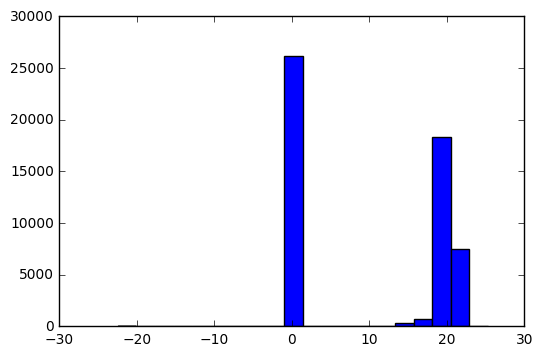

In [40]:
plt.hist(new_bill_train_min.credit_amount,20)
plt.show()

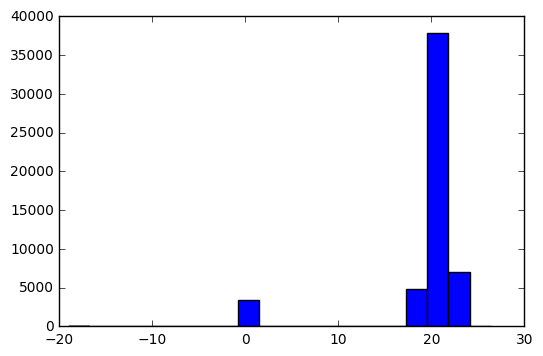

In [43]:
plt.hist(new_bill_train_max.credit_amount,20)
plt.show()

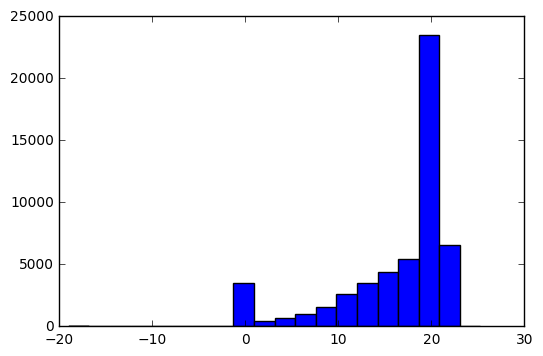

In [45]:
plt.hist(new_bill_train_mean.credit_amount,20)
plt.show()